# Introduction to Neural Networks 


** Ecole Centrale Nantes **

** Diana Mateus **


** Participants : **
 Saâd AZIZ ALAOUI et Ziang Xiong 


## General description
In this lab we will create a simple classifier based on neural networks. We will progress in two parts:
- In the first part, and to better understand the involved operations, we will create a single-neuron model and optimize its parameters "by hand". For this first part we will only use the **Numpy** library
- We will then build a multi-layer perceptron with the built-in library **Keras** module and **tensorflow**. Tensorflow is already installed in the university computers. If using your own computer you should have already installed **tensorflow** or use **collab** online platform.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
from sklearn.utils import shuffle


### Loading the dataset
Start by runing the following lines to load and visualize the data.

In [3]:
def load_dataset():
    train_dataset = h5py.File('dataset/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
    test_dataset = h5py.File('dataset/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

train_x, train_y, test_x, test_y, classes=load_dataset()

#### Visualize data

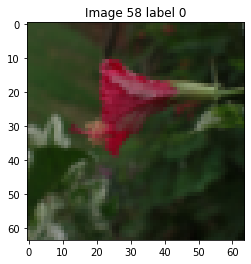

Train X shape: (209, 64, 64, 3)
We have 209 images of dimensionality 64x64x3


In [4]:
# run several times to visualize different data points
# the title shows the ground truth class labels (0=no cat , 1 = cat)
index = np.random.randint(low=0,high=train_y.shape[1])
plt.imshow(train_x[index])
plt.title("Image "+str(index)+" label "+str(train_y[0,index]))
plt.show()
print ("Train X shape: " + str(train_x.shape))
print ("We have "+str(train_x.shape[0]), 
       "images of dimensionality " 
       + str(train_x.shape[1])+ "x"
       + str(train_x.shape[2])+ "x"
       + str(train_x.shape[3]))

#### Preprocessing
In the following lines we vectorize the images (Instead of a 2-D image we will give as input to the models a 1-D vector). The normalization makes the image intensities be between 0 and 1, and converts the images to floats.

In [5]:
train_x = train_x.reshape(train_x.shape[0], -1).T
test_x = test_x.reshape(test_x.shape[0], -1).T
print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(test_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 209)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [6]:
train_x = train_x/255.
test_x = test_x/255.


### 1. Classification with a single neuron 


**a)** Fill-in the following three functions to define the single neuron model (a single neuron in the hidden layer):
- A function **initialize_parameters** of the neuron. The function will randomly initializes the model's weights with small values. Initialize the bias with 0. What is the number of weights required? pass this information as a parameter to the function.
- A function **sigmoid** that computes the sigmoid activation function
- A function **neuron** that given an input vector, the weights and bias, computes the output of the single neuron model

In [7]:
def sigmoid(z):
    z = 1/(1+np.exp(-z))
    return z

In [8]:
def initialize_parameters(dim):
    w = (np.random.rand(dim,1))*0.000001 # valeur d'ini
    b = 0
    return w, b


In [9]:
def neuron(w,b,X):
    pred_y = sigmoid(np.matmul(w.T,X) + b)
    return pred_y

**b)** **Forward Pass:**
Use the three functions above to compute a first forward pass for the input matrix $X$ containing the loaded dataset, for some initialization of the weights and bias.
 
 \begin{align}
 Y_{\rm pred}=\sigma(w^\top X+b) = [y_{\rm pred}^{(1)},y_{\rm pred}^{(2)},\dots,y_{\rm pred}^{(m)}]
 \end{align}
 

In [10]:
dim = train_x.shape[0]
w, b = initialize_parameters(dim)
print(w.shape)
pred_y = neuron(w, b, train_x)

(12288, 1)


**c) Cost estimation:**
 
We will use a binary cross-entropy loss, so that the empirical risk can be computed as:
 \begin{align}
 E = - \frac{1}{m} \sum_{i=1}^m 
 y^{(i)} \log(y_{\rm pred}^{(i)}) +
 (1-y^{(i)}) \log(1-y_{\rm pred}^{(i)})
 \end{align}
 
 The following cross-entropy function should give as result the scalar cost value computed over the entire dataset

In [28]:
def crossentropy(Y,Ypred):
    
    eps = 10**-6
    cost = -np.sum(Y * np.log(Ypred + eps) + (1 - Y) * np.log(1 - Ypred+ eps)) / Ypred.shape[1]
    
    return cost

**d) Back propagation:**

After initializing the parameters and doing a forward pass, we need to backpropagate the cost by computing the gradient with respect to the model parameters to later update the weights

\begin{align}
\frac{\partial E}{\partial w} = \\
\frac{\partial E}{\partial b} = 
\end{align}

See a demonstration of the gradient computation in 
https://en.wikipedia.org/wiki/Cross_entropy

Fill-in the backpropagation function which receives as input the the training set (X,Y), as well as the current predictions and returns the gradients updates for the weights and bias

Hint: When the error is computed for several samples simultaneously, the gradient is averaged over the contribution of different samples.

In [29]:
def backpropagate(X, Y, Ypred):
    m = X.shape[1]
    
    #find gradient (back propagation)
    dw = np.matmul(X, (Ypred - Y).T) / m
    db = np.sum(Ypred - Y) / m
    grads = {"dw": dw,
             "db": db} 
    
    return grads

grads = backpropagate(train_x, train_y.ravel(), pred_y)

**e) Optimization**
After initializing the parameters, computing the cost function, and calculating gradients, we can now update the parameters using gradient descent. Use the functions implemented above to fill_in the "gradient_descent" function that optimizes the parameters given a training set X, Y, a fixed number of iterations, and a learning_rate. Store and plot the value of the loss function at each iteration

In [58]:
def gradient_descent(X, Y, iterations, learning_rate):
    costs = []
    w, b = initialize_parameters(X.shape[0])
    
    for i in range(iterations):
        Ypred = neuron(w, b, X)
        cost = crossentropy(Y, Ypred)
        grads = backpropagate(X, Y, Ypred)
        
        #update parameters
        w -= learning_rate * grads['dw']
        b -= learning_rate * grads['db']
        costs.append(cost)
        
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
       
    return w,b, costs

w, b, costs = gradient_descent(train_x,train_y.ravel(),iterations=2000, learning_rate = 0.005)

Cost after iteration 0: 0.693507
Cost after iteration 100: 0.584506
Cost after iteration 200: 0.466947
Cost after iteration 300: 0.376005
Cost after iteration 400: 0.331462
Cost after iteration 500: 0.303272
Cost after iteration 600: 0.279878
Cost after iteration 700: 0.260041
Cost after iteration 800: 0.242939
Cost after iteration 900: 0.228003
Cost after iteration 1000: 0.214818
Cost after iteration 1100: 0.203077
Cost after iteration 1200: 0.192543
Cost after iteration 1300: 0.183032
Cost after iteration 1400: 0.174397
Cost after iteration 1500: 0.166520
Cost after iteration 1600: 0.159303
Cost after iteration 1700: 0.152666
Cost after iteration 1800: 0.146541
Cost after iteration 1900: 0.140871


**e) Plot the training curve**
Plot the evolution of the cost vs the iterations 

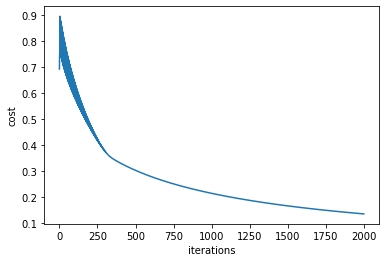

In [59]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.show()

**f) Prediction**
Use the optimized parameters to make predictions both for the train and test sets and compute the accuracy for each. What do you observe?

In [55]:
def predict(w, b, X):    
    y_pred = neuron(w,b,X)
    return y_pred

# predict 
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    

Train Acc: 92.07709512626529 %
Test Acc: 65.57764305174355 %


**g) Early stopping** 
- Adapt the gradient descent function to consider part (a percentage) of the training data for validation. Use the validation set to choose the training hyperparameters (learning_rate, iterations). 
- Plot the training and validation curves
- Report again the training and test accuracy and loss for the new trained model
- What do you observe



In [60]:
def gradient_descent_early_stopping(X, Y, iterations, learning_rate, percentage=.1):
    max_ind = int(Y.shape[0] * (1 - percentage))
    train_x, val_x = X[:, :max_ind], X[:, max_ind:]
    train_y, val_y = Y[:max_ind], Y[max_ind:]
    
    train_costs, val_costs = [], []
    w, b = initialize_parameters(train_x.shape[0])
    
    for i in range(iterations):
        Ypred = neuron(w, b, val_x)
        val_cost = crossentropy(val_y, Ypred)
        
        Ypred = neuron(w, b, train_x)
        train_cost = crossentropy(train_y, Ypred)
        grads = backpropagate(train_x, train_y, Ypred)
        
        #update parameters
        w -= learning_rate * grads['dw']
        b -= learning_rate * grads['db']
       
        train_costs.append(train_cost)
        val_costs.append(val_cost)
        
        if i % 100 == 0:
            print ("Train cost after iteration %i: %f" %(i, train_cost))
            print ("Val cost after iteration %i: %f" %(i, val_cost))
    
    return w, b, train_costs, val_costs

In [61]:
w, b, train_costs, val_costs = gradient_descent_early_stopping(train_x, train_y.ravel(), 2000, learning_rate=0.005)
train_pred_y = predict(w, b, train_x)
test_pred_y = predict(w, b, test_x)
loss =  crossentropy(train_y, train_pred_y)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))

Train cost after iteration 0: 0.693472
Val cost after iteration 0: 0.693830
Train cost after iteration 100: 0.592526
Val cost after iteration 100: 0.859225
Train cost after iteration 200: 0.460676
Val cost after iteration 200: 0.791770
Train cost after iteration 300: 0.358426
Val cost after iteration 300: 0.707003
Train cost after iteration 400: 0.313244
Val cost after iteration 400: 0.687228
Train cost after iteration 500: 0.284513
Val cost after iteration 500: 0.706959
Train cost after iteration 600: 0.260921
Val cost after iteration 600: 0.724923
Train cost after iteration 700: 0.241091
Val cost after iteration 700: 0.741647
Train cost after iteration 800: 0.224125
Val cost after iteration 800: 0.757447
Train cost after iteration 900: 0.209409
Val cost after iteration 900: 0.772506
Train cost after iteration 1000: 0.196501
Val cost after iteration 1000: 0.786943
Train cost after iteration 1100: 0.185074
Val cost after iteration 1100: 0.800832
Train cost after iteration 1200: 0.17488

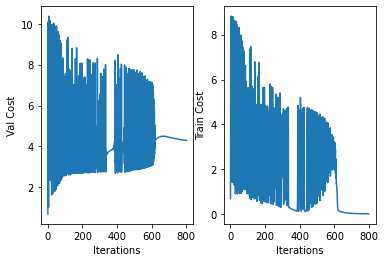

In [52]:
plt.subplot(1,2,1)
plt.plot(val_costs)
plt.ylabel('Val Cost')
plt.xlabel('Iterations')
plt.subplot(1,2,2)
plt.plot(train_costs)
plt.ylabel('Train Cost')
plt.xlabel('Iterations')
plt.show()

L'early stopping est une méthode de régularisation qui implique d'interrompre l'entraînement d'un modèle d'apprentissage lorsque la perte d'un ensemble de données de validation commence à augmenter et que les performances de généralisation se dégradent. On voit que pour certaines valeurs d'iteration / learning rate, notre early stopping a certes un train acc plus faible, mais un test acc plus élevé ce qui est le but !


### 2. CNNs with Keras

Adapt the example in this website https://keras.io/examples/vision/mnist_convnet/ to our problem. To this end:
- change the number of classes and the input size
- remove the expand_dims(x_train, -1): it is not necessary to expand the dimensions since our input is 3-dimensional 
- you may need to transpose the labels vector
- change the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. 
- also change the softmax to sigmoid, the more appropriate activation function for binary data

We can choose a single neuron output passed through sigmoid, and then set a threshold to choose the class, or use two neuron output and then perform a softmax.

**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.

**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

**2.3** How many parameters does the network have, explain where the number comes from.

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

In [62]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [63]:
# Model / data parameters
# num_classes = 1
# input_shape = x_train.shape[1:]
#print(input_shape)

# the data, split between train and test sets
x_train, y_train, x_test, y_test, classes=load_dataset()
num_classes = 1
input_shape = x_train.shape[1:]
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (64, 64, 3)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = y_train.T
y_test = y_test.T




x_train shape: (209, 64, 64, 3)
209 train samples
50 test samples


In [64]:
#build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="sigmoid"),
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0

In [65]:
#comiple and fit
batch_size = 4
epochs = 15

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
47/47 [==============================] - 2s 24ms/step - loss: 0.6600 - accuracy: 0.5904 - val_loss: 0.4983 - val_accuracy: 0.8095
Epoch 2/15
47/47 [==============================] - 1s 17ms/step - loss: 0.5180 - accuracy: 0.6702 - val_loss: 0.5711 - val_accuracy: 0.7619
Epoch 3/15
47/47 [==============================] - 1s 18ms/step - loss: 0.4641 - accuracy: 0.7926 - val_loss: 0.5135 - val_accuracy: 0.8095
Epoch 4/15
47/47 [==============================] - 1s 17ms/step - loss: 0.3903 - accuracy: 0.8351 - val_loss: 0.4713 - val_accuracy: 0.8095
Epoch 5/15
47/47 [==============================] - 1s 17ms/step - loss: 0.3254 - accuracy: 0.8670 - val_loss: 0.6818 - val_accuracy: 0.7143
Epoch 6/15
47/47 [==============================] - 1s 16ms/step - loss: 0.3785 - accuracy: 0.8085 - val_loss: 0.6082 - val_accuracy: 0.6667
Epoch 7/15
47/47 [==============================] - 1s 17ms/step - loss: 0.3035 - accuracy: 0.8777 - val_loss: 0.6269 - val_accuracy: 0.7619
Epoch 8/15
47

In [66]:
#evaluate
score_train = model.evaluate(x_train, y_train, verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

Train loss: 0.2291235625743866
Train accuracy: 0.9234449863433838
Test loss: 0.765349268913269
Test accuracy: 0.6800000071525574


**2.1** Can you get the accuracy better than in our hand single-neuron model?Try different configurations and explain the changes you have made.


- Definitely，it's better than the hand single-neuron model as we got better train accuracy and test accuracy.
- As the title says，we changed the categorical cross-entropy to the binary cross entropy given that our problem is binary classification. And we also change the softmax to sigmoid, the more appropriate activation function for binary data. In addition, we use the fonction adam as the optimizer to replace the gradient descent function .
- for the choose of batch_size and epochs, we choose batch_size = 4 as there are only 209 train samples, and we let epochs =15 which can ensure the train accuracy and not cost too much time.


**2.2** Compute the train and test loss and accuracy after the model has been trained.  What model parameters does the ``fit`` function retain?

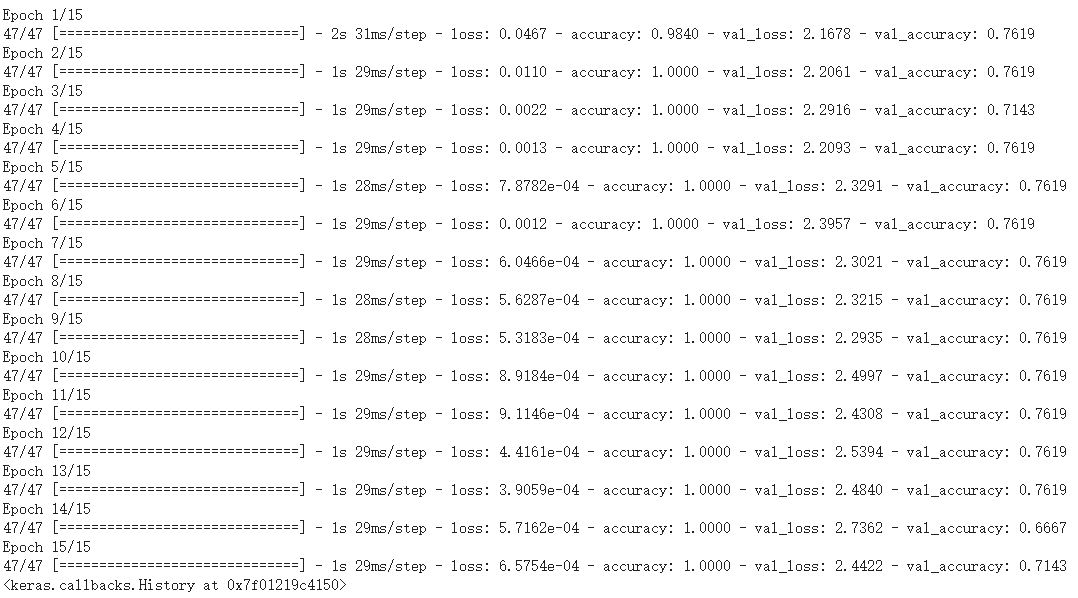

- As we can see in the image, the fit function retains the loss, accuracy, val_loss, val_accuracy.（Train loss，Train accuracy，Test loss，Test accuracy）

**2.3** How many parameters does the network have, explain where the number comes from.

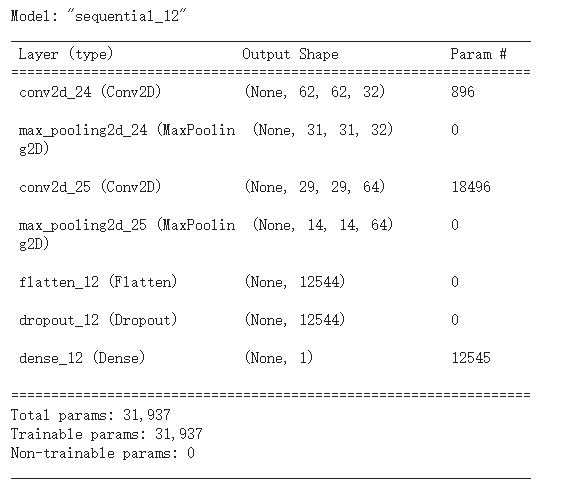

- In total, we have 31937 parameters, where they come from have been shown in the image above.
- For the first convolution layer: 896 parameters { (3 * 3 * 3+1)*32 = 896 }
- For the second convolution layer: 18496 parameters { (3 * 3 * 32+1)*64 = 18496 }
- For the dense layer: 12545 parameters { (12544+1)*1 = 12545 }
 

**2.4** What is the receptive field of the network https://distill.pub/2019/computing-receptive-fields/

- 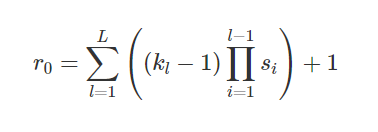

According to this formula, given from the paper.
- For this network, L=2, k1 = 3 * 3, k2 = 3 * 3, s1=1，s2=1
- So we can get that the receptive field = （9-1) * 1+(9-1) * 1*1+1=17

## BONUS: 
Replace the fit function by your own tensorflow  implementation

1. Instantiate one of keras.optimizers to train the model.

optimizer = 

2. Instantiate a loss from keras.losses

loss_fn = 

3. Prepare the metrics. Instatiate the metrics from keras.metrics

train_acc_metric =
val_acc_metric =

4. Stochastic Gradient Loop
    * Iterate over the dataset in batches with 
    * Open a GradientTape() scope 
    * Inside this scope call the model (forward pass)
    * Compute the loss outside the scope
    * Retrieve the weight gradients
    * Use the optimimzer to update the weights with the gradients



In [68]:
import tensorflow as tf
optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
loss_fn = keras.losses.BinaryCrossentropy()



C:\Users\saada\anaconda3\lib\site-packages\keras\optimizer_v2\adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)
